In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/housing-prices-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Arufureddo\.cache\kagglehub\datasets\yasserh\housing-prices-dataset\versions\1


In [6]:
data = pd.read_csv(f"{path}/Housing.csv")

In [7]:
print("Первичные сведения о данных:")
print(data.info())  # Информация о данных
print("\nПример данных:")
print(data.head())  # Пример первых строк

Первичные сведения о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Пример данных:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420        

In [8]:
missing_values = data.isnull().sum()
print("\nКоличество пропущенных значений в каждом столбце:")
print(missing_values)


Количество пропущенных значений в каждом столбце:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
duplicates = data.duplicated().sum()
print(f"\nКоличество дубликатов: {duplicates}")


Количество дубликатов: 0


In [10]:
# Удаление дубликатов
data = data.drop_duplicates()

# Обработка пропусков (пример с медианой)
data.fillna(data.median(numeric_only=True), inplace=True)

In [11]:
print("\nОсновные статистические показатели:")
print(data.describe())


Основные статистические показатели:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [12]:
# Выбираем только числовые столбцы
numerical_data = data.select_dtypes(include=[np.number])

# Вычисление асимметрии и эксцесса
skewness = numerical_data.skew()
kurtosis = numerical_data.kurtosis()

print("\nАсимметрия числовых переменных:")
print(skewness)
print("\nЭксцесс числовых переменных:")
print(kurtosis)


Асимметрия числовых переменных:
price        1.212239
area         1.321188
bedrooms     0.495684
bathrooms    1.589264
stories      1.082088
parking      0.842062
dtype: float64

Эксцесс числовых переменных:
price        1.960130
area         2.751480
bedrooms     0.728323
bathrooms    2.164856
stories      0.679404
parking     -0.573063
dtype: float64


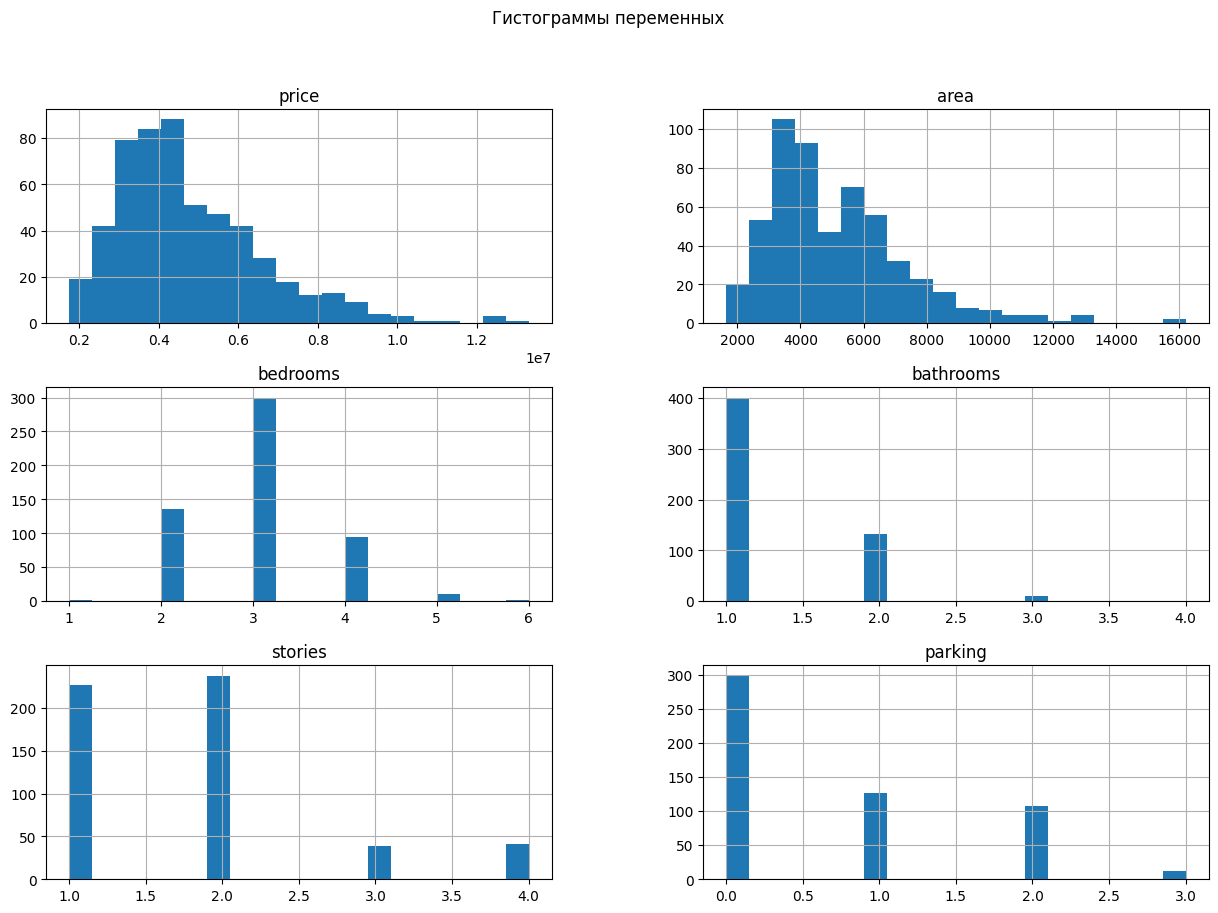

In [13]:
# Построение гистограмм
data.hist(bins=20, figsize=(15, 10))
plt.suptitle("Гистограммы переменных")
plt.show()

In [14]:
# Выявление выбросов с помощью IQR только для числовых столбцов
numeric_data = data.select_dtypes(include=[np.number])  # Выбираем только числовые столбцы

# Расчет квартилей и межквартильного размаха (IQR)
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

# Определяем выбросы
outliers = ((numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))).sum()

print("\nКоличество выбросов в каждом числовом столбце:")
print(outliers)


Количество выбросов в каждом числовом столбце:
price        15
area         12
bedrooms     12
bathrooms     1
stories      41
parking      12
dtype: int64


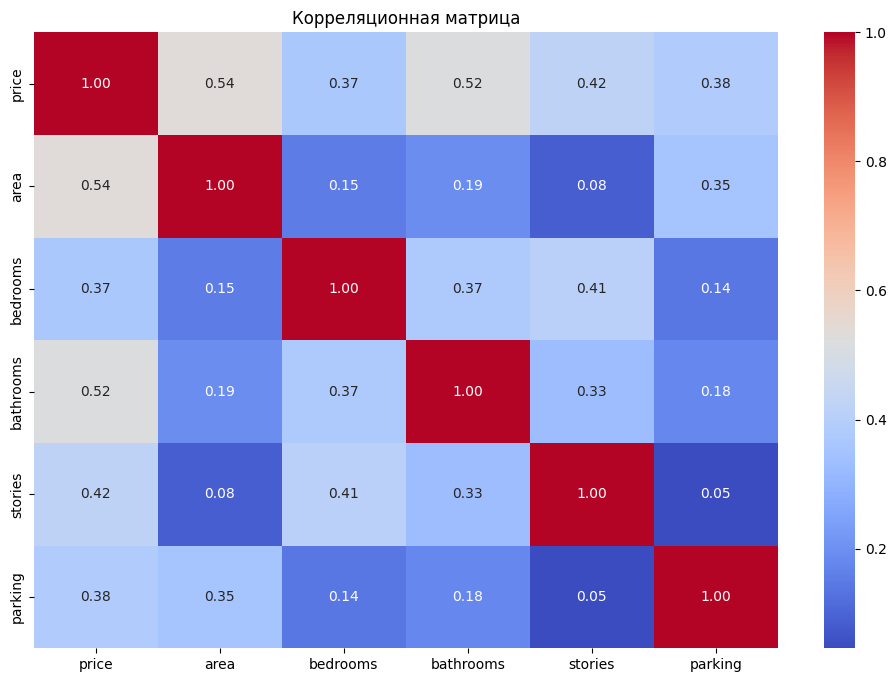

In [15]:
# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()


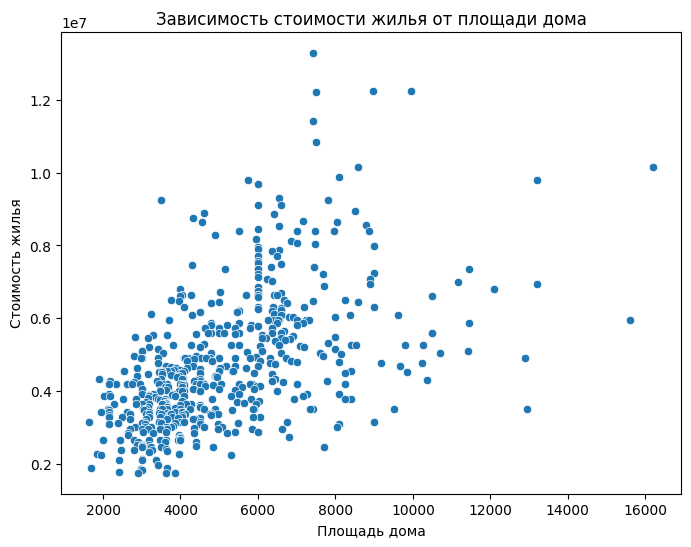

In [16]:
if 'price' in data.columns and 'area' in data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data['area'], y=data['price'])
    plt.title("Зависимость стоимости жилья от площади дома")
    plt.xlabel("Площадь дома")
    plt.ylabel("Стоимость жилья")
    plt.show()

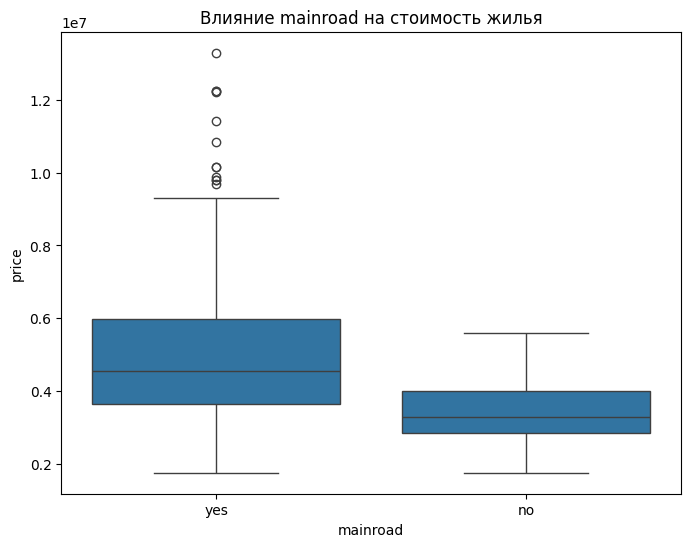

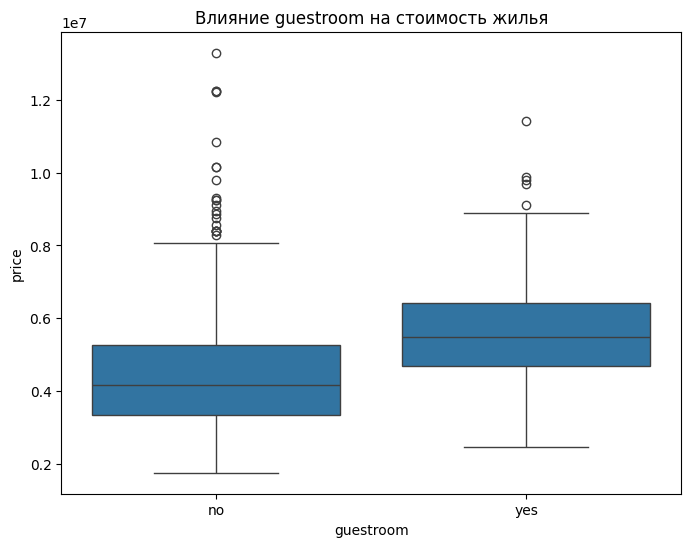

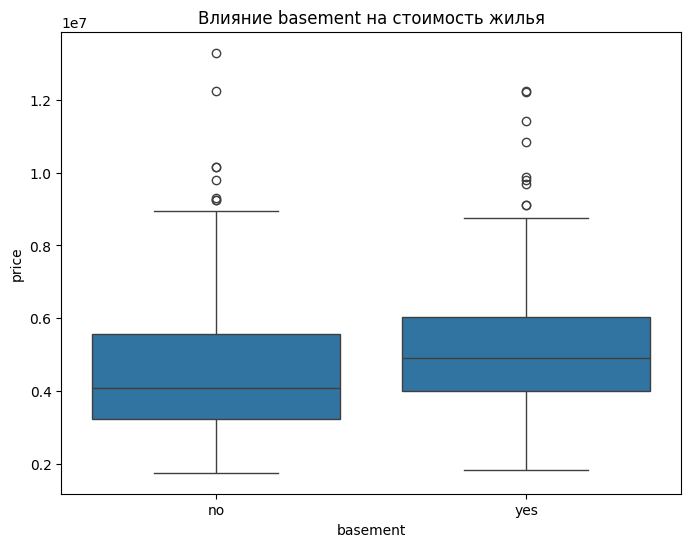

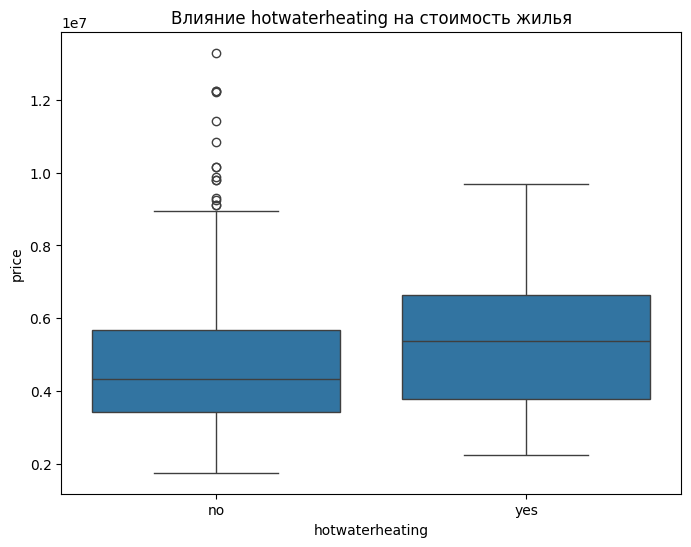

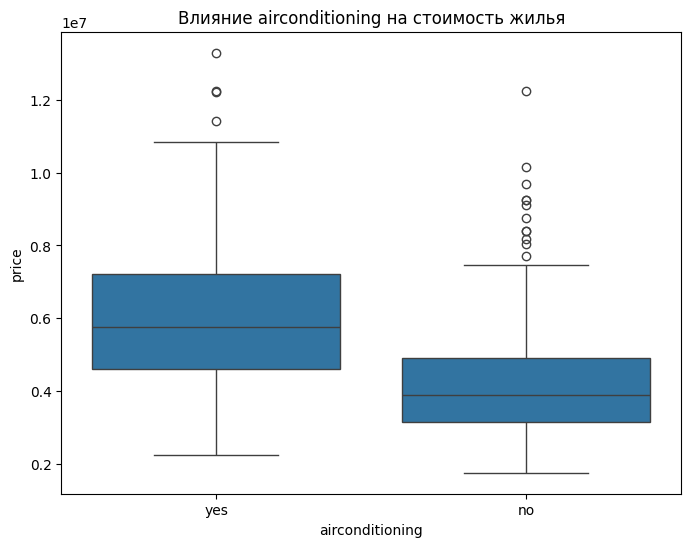

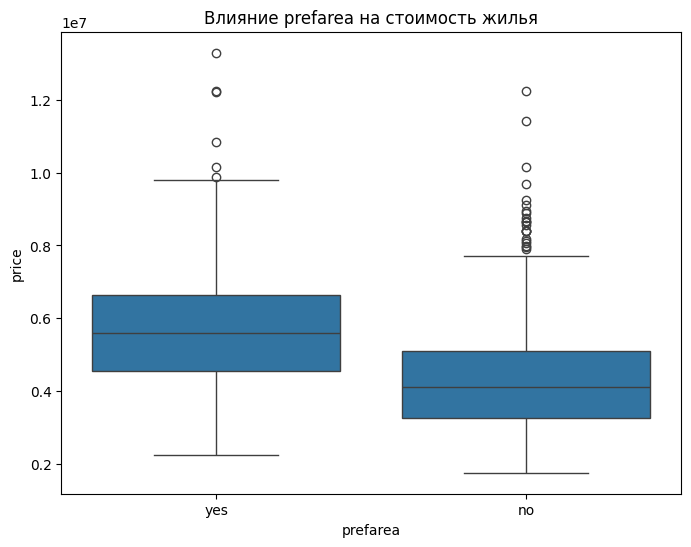

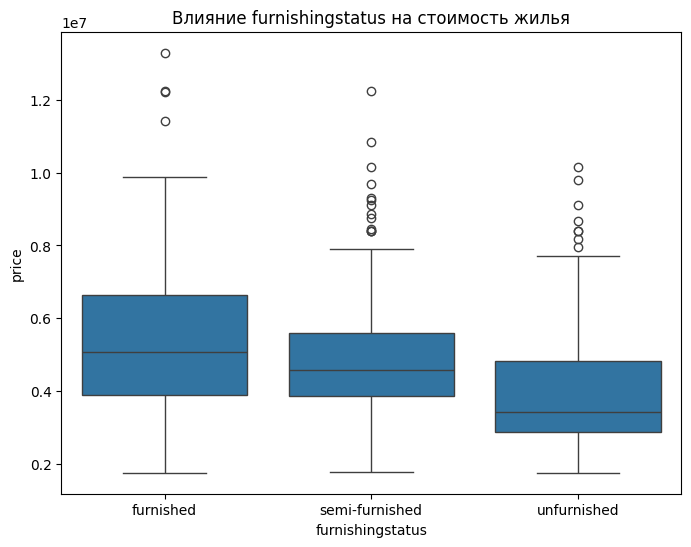

In [17]:
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='price', data=data)
    plt.title(f"Влияние {col} на стоимость жилья")
    plt.show()


Feature: price                               |▋         | [  7%]   00:00 -> (00:00 left)

AttributeError: module 'numpy' has no attribute 'VisibleDeprecationWarning'

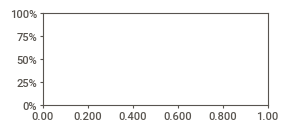

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data, title="EDA Report", explorative=True)
profile.to_file("eda_report.html")

print("Автоматический отчет сохранен в файл eda_report.html")